# Potato Disease Classification
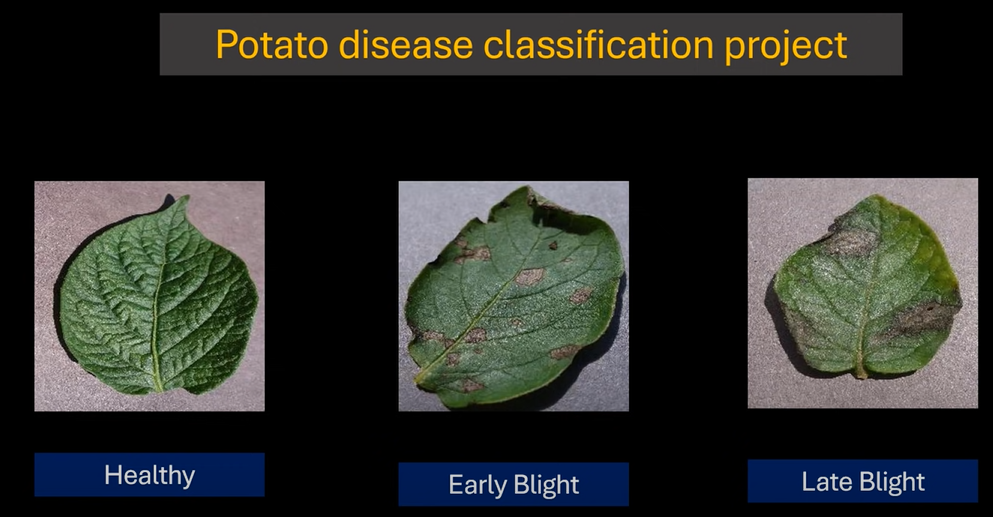

In [1]:
# Import all the Dependencies and packages
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf

- Set all the Constants


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

# Import data into tensorflow dataset object
- We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


# EXPLORATORY DATA ANALYSIS

In [4]:
# checking class names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

**Potato___Early_blight'**

- This label indicates that the potato plant leaf has early blight, which is a common fungal disease caused by Alternaria solani. Early blight typically presents as dark, concentric spots on the leaves and can lead to significant crop damage if not managed properly.

**'Potato___Late_blight'**

- This label signifies that the potato plant leaf is affected by late blight, another serious disease caused by the oomycete Phytophthora infestans. Late blight is infamous for causing the Irish potato famine in the 19th century and presents as large, water-soaked lesions that can quickly spread and destroy the plant.

**'Potato___healthy'**

- This label denotes that the potato plant leaf is healthy, showing no signs of disease or distress. A healthy leaf is typically uniform in color and free from spots, lesions, or discoloration.

In [5]:
# Assuming `dataset` is a tf.data.Dataset object already defined and batched
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

***(32, 256, 256, 3)***

This tuple represents the shape of the image_batch. Each dimension of the tuple has the following meaning:

- 32: The batch size, meaning there are 32 images in this batch.
- 256: The height of each image in pixels.
- 256: The width of each image in pixels.
- 3: The number of color channels in each image, typically corresponding to RGB (Red, Green, Blue).

So, this indicates that the batch contains 32 images, each of size 256x256 pixels with 3 color channels.

***[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]***

- This array represents the labels for the images in the batch. Each number corresponds to the class label of an image in the batch. Based on the provided list of class names ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'], the numbers can be interpreted as follows:

- - 0: Represents 'Potato___Early_blight'
- 1: Represents 'Potato___Late_blight'
- 2: Represents 'Potato___healthy'


So, the array [1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0] indicates the following:

- The first three images in the batch are labeled as 'Potato___Late_blight' (1).
- The next four images are labeled as 'Potato___Early_blight' (0).
- The subsequent sequence continues with the same logic, associating each image with its respective label.

In [6]:
#checking the length of the dataset
len(dataset)

68

## Visualize some of the images from our dataset

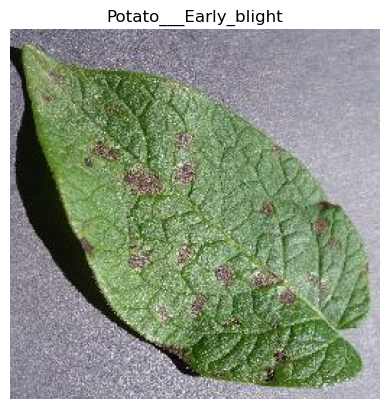

In [7]:
#Displying the  potatato leaf images
for image_batch, labels_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")

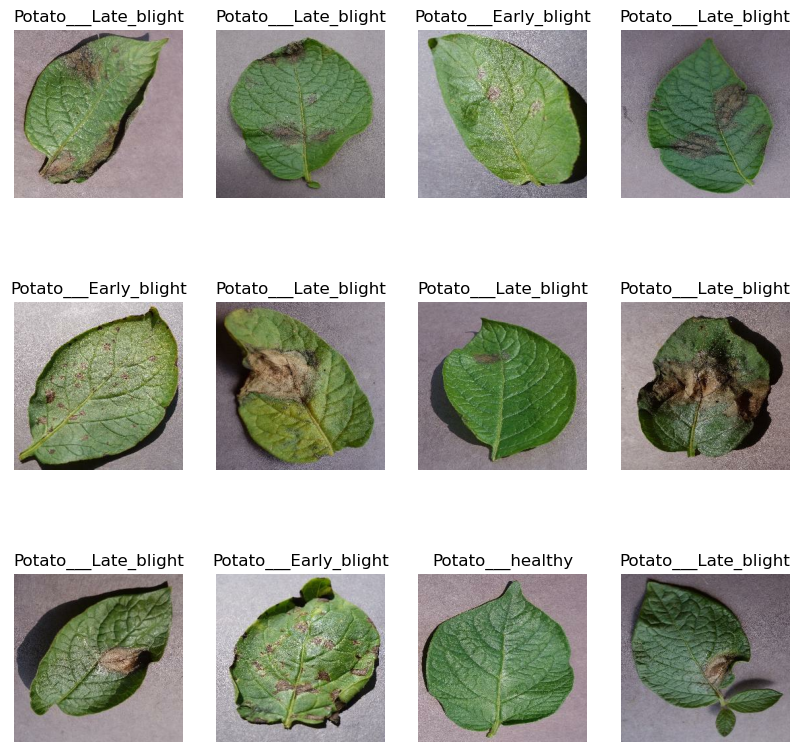

In [8]:
#Displaying 12 images
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# DATA PREPOCESSING , PREPARATION 

## Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:

- Training: Dataset to be used while training
- Validation: Dataset to be tested against while training
- Test: Dataset to be tested against after we trained a model

In [9]:
# length of the dataset
len(dataset)

68

In [10]:
# Define the proportion of the dataset to be used for training
train_size = 0.8

# Calculate the number of samples to be used for training based on the specified proportion
num_train_samples = len(dataset) * train_size
num_train_samples

54.400000000000006

- Sets train_size to 0.8, meaning 80% of the dataset will be allocated for training.
- Then we calculate the number of training samples by multiplying the total number of samples in the dataset (len(dataset)) by the training proportion (train_size).
- 54.400000000000006 is the calculated number of training samples. This indicates that if len(dataset) returns a number, multiplying it by 0.8 resulted in 54.400000000000006

## Next Steps
- Since the number of samples must be an integer, this fractional number will typically be rounded to the nearest whole number or truncated to ensure an integer value. This can be done using functions such as round(), int(), or similar methods depending on the specific requirements of the data split

In [11]:
num_train_samples = int(len(dataset) * train_size)
print(num_train_samples)


54


In [12]:
# Take the first 54 samples from the dataset to create the training dataset
train_ds = dataset.take(54)

# Calculate the number of samples in the training dataset
len(train_ds)

54

- The dataset.take(54) method extracts the first 54 samples from the original dataset and assigns them to train_ds. This effectively creates a new dataset train_ds that contains only the first 54 samples, which are intended to be used for training.

In [13]:
# Skip the first 54 samples in the dataset to create the test dataset
test_ds = dataset.skip(54)

# Calculate the number of samples in the test dataset
len(test_ds)

14

This output confirms that test_ds contains exactly 14 samples, which aligns with the total number of samples in the original dataset (68) minus the number of samples used for training (54). This division ensures a proper split between training and testing datasets.

In [14]:
# Define the proportion of the dataset to be used for validation
val_size = 0.1

# Calculate the number of samples to be used for validation based on the specified proportion
num_val_samples = len(dataset) * val_size  
num_val_samples
 


6.800000000000001

In [15]:
# Create the validation dataset by taking the first 6 samples from the test dataset
val_ds = test_ds.take(6)

# Calculate the number of samples in the validation dataset
len(val_ds)

6

In [16]:
# Update the test dataset by skipping the first 6 samples (which are now in the validation dataset)
test_ds = test_ds.skip(6)

# Calculate the number of samples remaining in the test dataset
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    """
    Splits a TensorFlow dataset into training, validation, and testing partitions.

    Args:
        ds (tf.data.Dataset): The TensorFlow dataset to be split.
        train_split (float): The proportion of the dataset to be used for training (default is 0.8).
        val_split (float): The proportion of the dataset to be used for validation (default is 0.1).
        test_split (float): The proportion of the dataset to be used for testing (default is 0.1).
        shuffle (bool): Whether to shuffle the dataset (default is True).
        shuffle_size (int): The size of the shuffle buffer (default is 10000).

    Returns:
        train_ds (tf.data.Dataset): The training dataset.
        val_ds (tf.data.Dataset): The validation dataset.
        test_ds (tf.data.Dataset): The testing dataset.
    """
    # Assert that the sum of split proportions equals 1
    assert (train_split + test_split + val_split) == 1
    
    # Calculate the size of the dataset
    ds_size = len(ds)
    
    # Shuffle the dataset if required
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    # Calculate sizes of training, validation, and testing partitions
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    # Create training dataset by taking first 'train_size' samples
    train_ds = ds.take(train_size)    
    
    # Create validation dataset by skipping training samples and taking next 'val_size' samples
    val_ds = ds.skip(train_size).take(val_size)
    
    # Create testing dataset by skipping training and validation samples
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
#length of the training
len(train_ds)

54

In [20]:
# length of the valuation
len(val_ds)

6

In [21]:
# lenth of testing
len(test_ds)

8

### Cache, Shuffle, and Prefetch the Dataset

In [22]:
# Cache, shuffle, and prefetch the training dataset for improved performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Cache, shuffle, and prefetch the validation dataset for improved performance
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Cache, shuffle, and prefetch the testing dataset for improved performance
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



Caching (cache()):

- Caching involves storing dataset elements in memory or on disk after the first iteration through the dataset. This avoids redundant data loading and preprocessing operations for subsequent iterations, leading to faster data access. By caching the dataset, we ensure that the same data doesn't need to be reloaded and preprocessed during each epoch of model training, thus saving time and computational resources.

Shuffling (shuffle()):

- Shuffling the dataset involves randomizing the order of its elements, which is crucial for stochastic gradient descent optimization. By shuffling the dataset, we introduce randomness into the training process, preventing the model from becoming biased by the order of examples. This randomness ensures that the model encounters a diverse range of examples during each training epoch, leading to better generalization and improved model performance.

Prefetching (prefetch()):


- Prefetching allows overlapping of data preprocessing and model training. It fetches batches of data in the background while the model is training on the current batch. By prefetching data, we reduce the idle time of the GPU or CPU, ensuring that the computing resources are fully utilized. This overlapping of data loading and model training leads to faster overall training times, as the model spends less time waiting for data to be loaded.

## Building the Model

Creating a Layer for Resizing and Normalization


- Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.



In [23]:
# Define the image size
IMAGE_SIZE = (256, 256)

# Sequential model for resizing and rescaling images
resize_and_rescale = tf.keras.Sequential([
    # Resize images to the specified dimensions
    layers.Resizing(*IMAGE_SIZE),
    # Rescale pixel values to the range [0, 1]
    layers.Rescaling(1.0/255),
])


## Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [24]:
# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    # Randomly flip images horizontally and vertically
    layers.RandomFlip("horizontal_and_vertical"),
    # Randomly rotate images by up to 20 degrees
    layers.RandomRotation(0.2),
])


In [25]:
# Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## Model Architecture

- We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

- We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks

In [26]:
# Define the image size
IMAGE_SIZE = (256, 256)
# Define the batch size
BATCH_SIZE = 32
# Define the number of channels
CHANNELS = 3
# Define the number of classes
n_classes = 3

# Define the input shape
input_shape = (BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)

# Define the preprocessing layers
resize_and_rescale = tf.keras.Sequential([
    # Resize images to the specified dimensions
    layers.Resizing(*IMAGE_SIZE),
    # Rescale pixel values to the range [0, 1]
    layers.Rescaling(1.0/255),
])

# Define the model architecture
model = models.Sequential([
    # Preprocessing layers
    resize_and_rescale,
    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer
    layers.Flatten(),
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model with the specified input shape
model.build(input_shape=input_shape)


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [28]:
# Compile the model with optimizer, loss function, and metrics
model.compile(
    # Optimizer for training the model parameters
    optimizer='adam',
    
    # Loss function to measure the difference between model predictions and true labels
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    
    # Metrics to evaluate model performance during training
    metrics=['accuracy']
)


# model Training

##  10 epochs

In [29]:
# Train the model on the training dataset and validate on the validation dataset
history1 = model.fit(
    # Training dataset
    train_ds,
    
    # Batch size used during training
    batch_size=BATCH_SIZE,
    
    # Validation dataset used for evaluating the model after each epoch
    validation_data=val_ds,
    
    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    verbose=1,
    
    # Number of epochs (iterations over the entire dataset) for training the model
    epochs=10,
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4439 - loss: 0.9606 - val_accuracy: 0.5312 - val_loss: 0.8179
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5875 - loss: 0.7770 - val_accuracy: 0.7917 - val_loss: 0.4866
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7988 - loss: 0.4594 - val_accuracy: 0.8229 - val_loss: 0.3962
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8262 - loss: 0.3857 - val_accuracy: 0.9010 - val_loss: 0.2495
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8786 - loss: 0.2732 - val_accuracy: 0.8177 - val_loss: 0.4292
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1359s 26s/step - accuracy: 0.8697 - loss: 0.3156 - val_accuracy: 0.9323 - val_loss: 0.1652
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9175 - loss: 0.1976 - val_accuracy: 0.9479 - val_loss: 0.2067
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9469 - loss: 0.1413 - val_accuracy: 0.9323 - val_lo

In [30]:
# evaluating
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.9581 - loss: 0.1263


In [31]:
history1

In [32]:
# checking the params 
history1.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [33]:
# checking the keys
history1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

- loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [34]:
#type of loss
type(history1.history['loss'])

list

In [35]:
# length of history
len(history1.history['loss'])

10

In [36]:
history1.history['loss'][:10] # show loss for first 10 epochs

[0.9064564108848572,
 0.687629222869873,
 0.4690159261226654,
 0.35062816739082336,
 0.2917011082172394,
 0.25897786021232605,
 0.176927387714386,
 0.14170724153518677,
 0.20029965043067932,
 0.10840898007154465]

In [37]:
# Extract training accuracy and validation accuracy from history object
acc = history1.history['accuracy']       # Training accuracy
val_acc = history1.history['val_accuracy']   # Validation accuracy

# Extract training loss and validation loss from history object
loss = history1.history['loss']           # Training loss
val_loss = history1.history['val_loss']   # Validation loss


In [38]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.47685185074806213, 0.6660879850387573, 0.796875, 0.8501157164573669, 0.8807870149612427, 0.8940972089767456, 0.9270833134651184, 0.9438657164573669, 0.9282407164573669, 0.9554398059844971]
[0.53125, 0.7916666865348816, 0.8229166865348816, 0.9010416865348816, 0.8177083134651184, 0.9322916865348816, 0.9479166865348816, 0.9322916865348816, 0.9427083134651184, 0.9479166865348816]
[0.9064564108848572, 0.687629222869873, 0.4690159261226654, 0.35062816739082336, 0.2917011082172394, 0.25897786021232605, 0.176927387714386, 0.14170724153518677, 0.20029965043067932, 0.10840898007154465]
[0.817873477935791, 0.4865948259830475, 0.3961738646030426, 0.24947382509708405, 0.4292067289352417, 0.1652483493089676, 0.2067279815673828, 0.1875719428062439, 0.14840245246887207, 0.13925625383853912]


# 50 epochs

# next we try now training it on 50 epochs 

In [39]:
# Train the model on the training dataset and validate on the validation dataset
history2 = model.fit(
    # Training dataset
    train_ds,
    
    # Batch size used during training
    batch_size=BATCH_SIZE,
    
    # Validation dataset used for evaluating the model after each epoch
    validation_data=val_ds,
    
    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    verbose=1,
    
    # Number of epochs (iterations over the entire dataset) for training the model
    epochs=50,
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9668 - loss: 0.0987 - val_accuracy: 0.9115 - val_loss: 0.2044
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9554 - loss: 0.1146 - val_accuracy: 0.9635 - val_loss: 0.1003
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9666 - loss: 0.1037 - val_accuracy: 0.9479 - val_loss: 0.1873
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9700 - loss: 0.0903 - val_accuracy: 0.9375 - val_loss: 0.1596
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9778 - loss: 0.0787 - val_accuracy: 0.9583 - val_loss: 0.1456
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.9707 - loss: 0.0760 - val_accuracy: 0.9740 - val_loss: 0.0798
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9638 - loss: 0.1267 - val_accuracy: 0.9635 - val_loss: 0.1034
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9719 - loss: 0.0721 - val_accuracy: 0.9844 - val_loss

In [40]:
#Evaluating the model

model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.9952 - loss: 0.0215


[0.03423268347978592, 0.98828125]

In [41]:
history2

In [42]:
# checking the params 
history2.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [43]:
# checking the keys
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [44]:
history2.history['loss'][:10] # show loss for first 10 epochs

[0.10870493948459625,
 0.12104596197605133,
 0.08804631978273392,
 0.09125453233718872,
 0.08144731819629669,
 0.09607969224452972,
 0.09284046292304993,
 0.07902612537145615,
 0.08092328161001205,
 0.08621662110090256]

In [45]:
# Extract training accuracy and validation accuracy from history object
acc = history2.history['accuracy']       # Training accuracy
val_acc = history2.history['val_accuracy']   # Validation accuracy

# Extract training loss and validation loss from history object
loss = history2.history['loss']           # Training loss
val_loss = history2.history['val_loss']   # Validation loss


# Model Evaluation
Plotting the Accuracy and Loss Curves

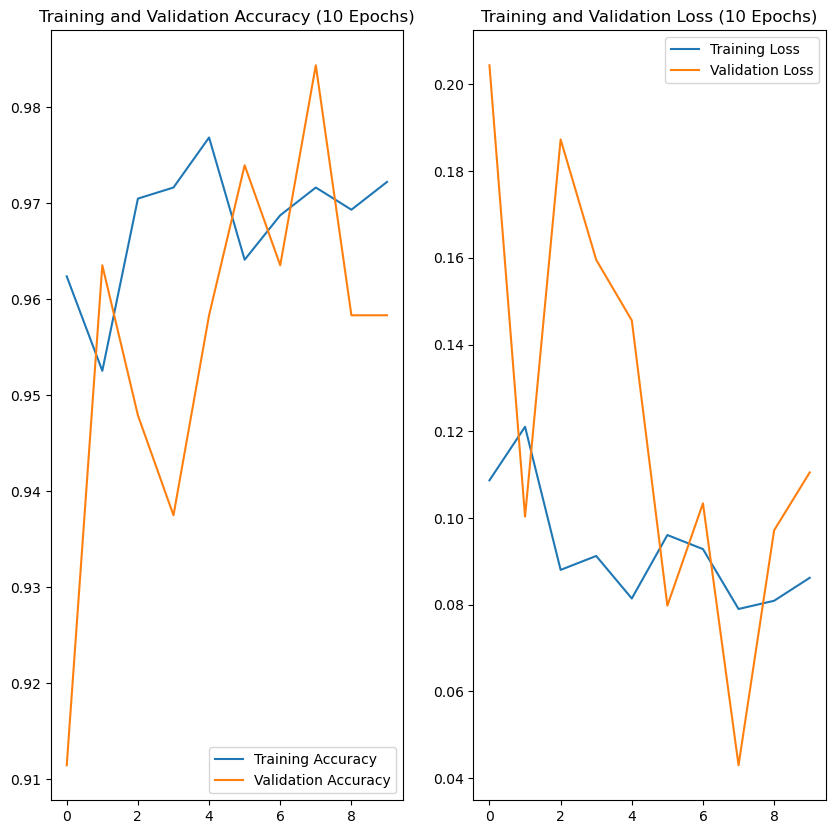

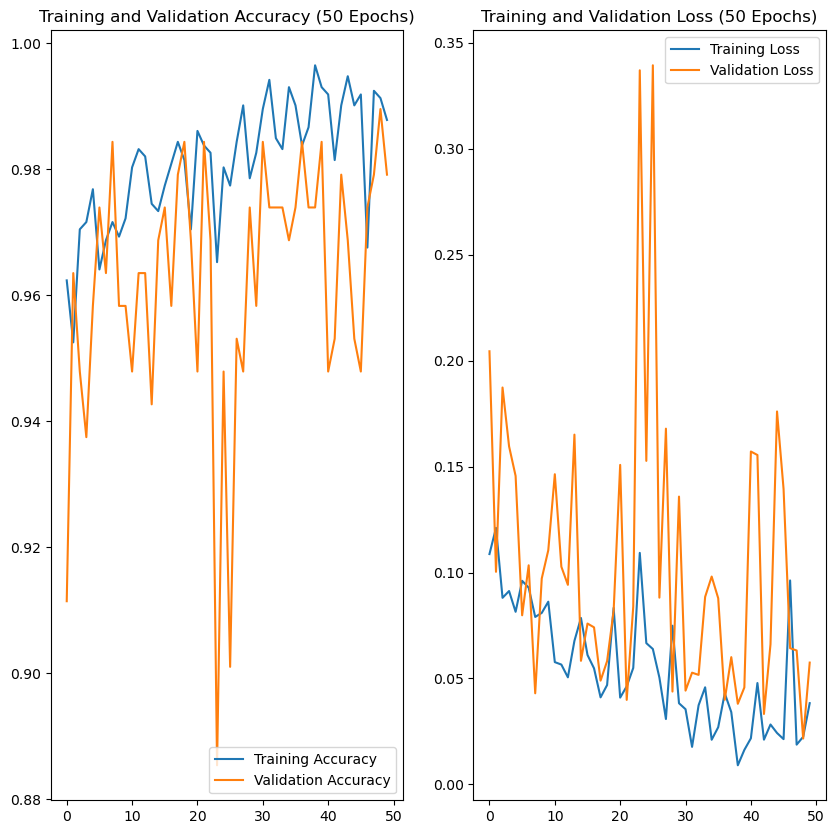

In [46]:
import matplotlib.pyplot as plt

# Number of epochs to plot
EPOCHS_10 = 10
EPOCHS_50 = 50

# Slicing the lists to contain only the first 10 epochs
acc_10 = acc[:EPOCHS_10]
val_acc_10 = val_acc[:EPOCHS_10]
loss_10 = loss[:EPOCHS_10]
val_loss_10 = val_loss[:EPOCHS_10]

# Slicing the lists to contain all 50 epochs
acc_50 = acc[:EPOCHS_50]
val_acc_50 = val_acc[:EPOCHS_50]
loss_50 = loss[:EPOCHS_50]
val_loss_50 = val_loss[:EPOCHS_50]

# Plotting for 10 epochs
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS_10), acc_10, label='Training Accuracy')
plt.plot(range(EPOCHS_10), val_acc_10, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (10 Epochs)')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS_10), loss_10, label='Training Loss')
plt.plot(range(EPOCHS_10), val_loss_10, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (10 Epochs)')

plt.show()

# Plotting for 50 epochs
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS_50), acc_50, label='Training Accuracy')
plt.plot(range(EPOCHS_50), val_acc_50, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (50 Epochs)')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS_50), loss_50, label='Training Loss')
plt.plot(range(EPOCHS_50), val_loss_50, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (50 Epochs)')

plt.show()


## Hyperparamter Tuning and Cross Validation
- Define the Hyperparameter Grid: Determine which hyperparameters to tune and define a grid of values for each hyperparameter.
- Cross-Validation: Split the dataset into training and validation sets, and perform k-fold cross-validation.
- Model Training and Evaluation: Train the model using each combination of hyperparameters on the training set and evaluate its performance on the validation set.
- Select the Best Hyperparameters: Choose the combination of hyperparameters that yield the best performance on the validation set.
- Final Evaluation: Train the model on the entire training set using the selected hyperparameters and evaluate its performance on the test set.

In [47]:
learning_rates = [0.001, 0.01, 0.1]  # Learning rates to try
num_layers = [3, 4, 5]  # Number of convolutional layers to try


In [48]:
from tensorflow.keras.optimizers import Adam

def build_and_evaluate_model(lr, num_layers):
    model = models.Sequential()
    model.add(layers.Resizing(*IMAGE_SIZE))
    model.add(layers.Rescaling(1.0/255))
    
    for _ in range(num_layers):
        model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    model.build(input_shape=input_shape)
    
    model.compile(optimizer=Adam(learning_rate=lr), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    
    history = model.fit(train_ds, batch_size=BATCH_SIZE, validation_data=val_ds, epochs=10, verbose=0)
    
    return history.history['val_accuracy'][-1]  # Return the final validation accuracy


## Confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


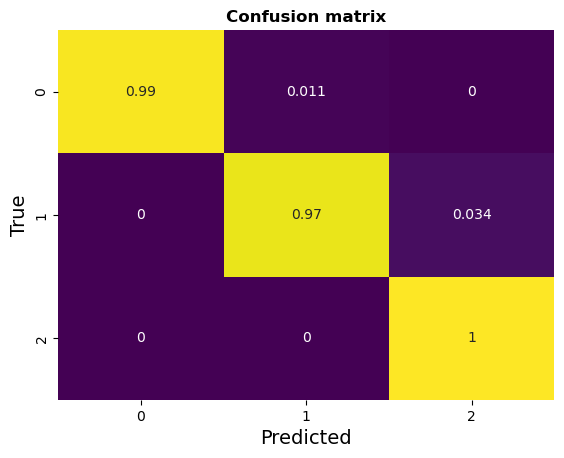

In [49]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:  
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

# Confusion matrix
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')

sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)

plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)

plt.show()

- Our model is performing better on all classes. 0 % of healthy leaves are classified as Late blight.  But 97 % accuracy also not bad for now!

## classification report
- Let’s look at some other metrics like precision, recall and f1-score.

In [50]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.99      0.97      0.98        87
           2       0.83      1.00      0.91        15

    accuracy                           0.98       192
   macro avg       0.94      0.98      0.96       192
weighted avg       0.98      0.98      0.98       192



- Our model has an accuracy of 0.98% which is a good  score
- Everything looks fine till now. We’ve successfully trained our model and saved it for future use. Let’s build our web application.

# Making Predictions

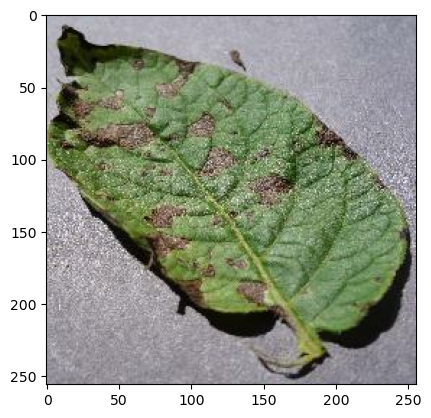

In [51]:

# Assuming test_ds is your test dataset
# Print first image
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.show()


First image to predict
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Predicted label: Potato___Early_blight


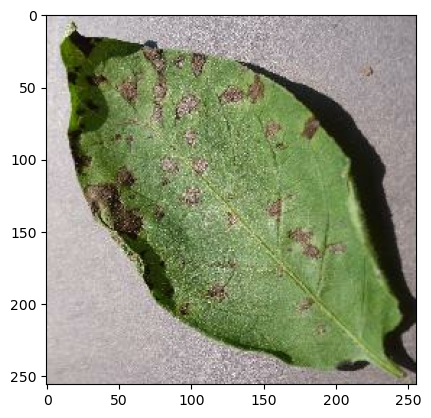

In [52]:
# Iterate over the first batch in the test dataset
for images_batch, labels_batch in test_ds.take(1):
    
    # Extract the first image from the batch and convert it to uint8 format for display
    first_image = images_batch[0].numpy().astype('uint8')
    
    # Extract the corresponding label for the first image
    first_label = labels_batch[0].numpy()
    
    # Print and display the first image
    print("First image to predict")
    plt.imshow(first_image)
    
    # Print the actual label of the first image using the class names
    print("Actual label:", class_names[first_label])
    
    # Predict the labels for the batch of images using the trained model
    batch_prediction = model.predict(images_batch)
    
    # Print the predicted label for the first image in the batch
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])


- Write a function for inference

In [53]:
# Function to predict the class of an image using the trained model
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


- Now let us  run inference on few sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


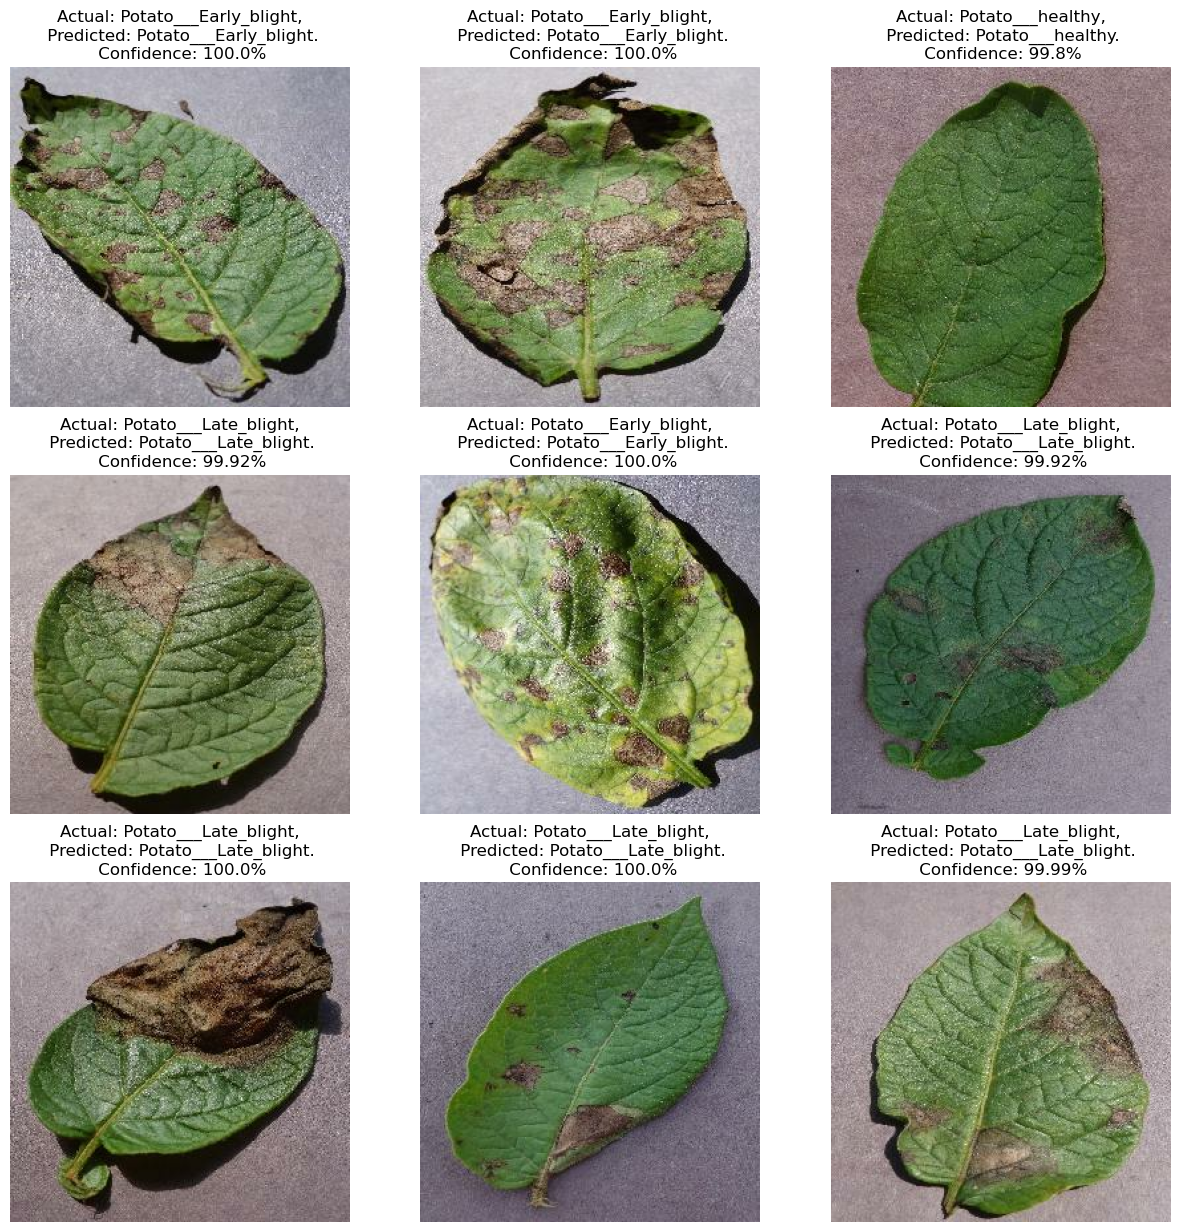

In [54]:
# Plotting a grid of images with their actual and predicted labels along with confidence
plt.figure(figsize=(15, 15))

# Iterate over the first batch of images in the test dataset
for images, labels in test_ds.take(1):
    # Iterate over each image in the batch
    for i in range(9):
        # Create subplots for each image
        ax = plt.subplot(3, 3, i + 1)
        
        # Display the image
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Predict the class and confidence for the current image
        predicted_class, confidence = predict(model, images[i].numpy())
        
        # Get the actual class label
        actual_class = class_names[labels[i]] 
        
        # Set the title for the subplot with actual and predicted labels along with confidence
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        # Turn off axis for cleaner visualization
        plt.axis("off")


# SAVING THE MODEL


In [67]:
import pathlib
import tensorflow as tf

# Define the directory to save the models
model_directory = r"C:\Users\Administrator\Downloads\POTATO_DISEASE\models"

# Ensure the directory exists
pathlib.Path(model_directory).mkdir(parents=True, exist_ok=True)

# Specify the model version and file path without an extension
model_version = 1
model_path = f"{model_directory}/model {model_version}"

# Save the model in the TensorFlow SavedModel format
tf.saved_model.save(model, model_path)




INFO:tensorflow:Assets written to: C:\Users\Administrator\Downloads\POTATO_DISEASE\models/model 1\assets


INFO:tensorflow:Assets written to: C:\Users\Administrator\Downloads\POTATO_DISEASE\models/model 1\assets


In [71]:
import pathlib
import tensorflow as tf
import re

# Define the directory to save the models
model_directory = r"C:\Users\Administrator\Downloads\POTATO_DISEASE\models"

# Ensure the directory exists
pathlib.Path(model_directory).mkdir(parents=True, exist_ok=True)

# List all directories in the model directory that match the pattern "model {integer}"
model_versions = [int(re.match(r"model (\d+)", i).group(1)) for i in os.listdir(model_directory) if re.match(r"model \d+", i)]

# Calculate the next model version
model_version = max(model_versions, default=0) + 1

# Specify the file path without an extension
model_path = f"{model_directory}/model {model_version}"

# Save the model in the TensorFlow SavedModel format
tf.saved_model.save(model, model_path)


INFO:tensorflow:Assets written to: C:\Users\Administrator\Downloads\POTATO_DISEASE\models/model 3\assets


INFO:tensorflow:Assets written to: C:\Users\Administrator\Downloads\POTATO_DISEASE\models/model 3\assets
